In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import seaborn as sns

In [3]:
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(10,6), 
    'axes.facecolor': 'white',
    'axes.grid': True, 'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1.5)


In [4]:
#train_data = pd.read_csv("../input/titanic/train.csv")

train_data = pd.read_csv("../data/train.csv")

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
print(*train_data.columns)

PassengerId Survived Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked


# PassengerId

# Survived

# Pclass

In [9]:
train_data['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

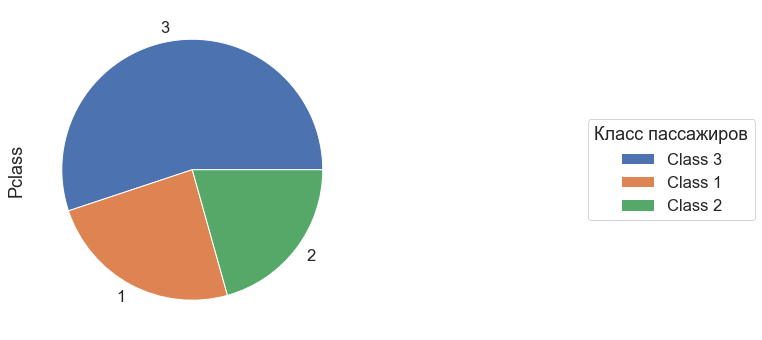

In [10]:
fig_pclass = train_data['Pclass'].value_counts()
fig_pclass.plot.pie().legend(labels=["Class 3", "Class 1", "Class 2"],
                            loc='center right', 
                            bbox_to_anchor=(2.25, 0.5)
                            ).set_title("Класс пассажиров")

Text(0.5, 1.0, 'Процентное соотношение выживних в разных классах')

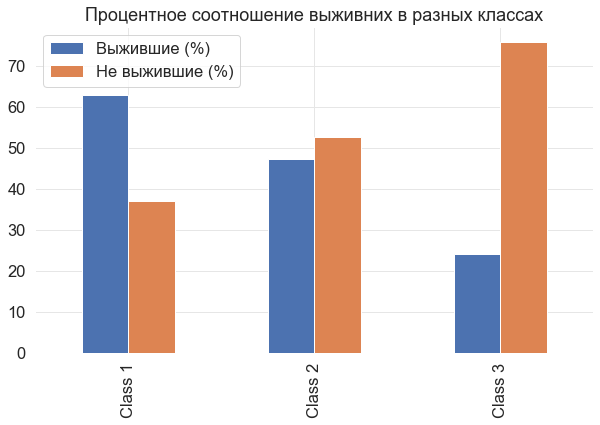

In [11]:
pclass_1_surv = round((train_data[train_data['Pclass'] == 1].Survived == 1).value_counts()[1]/
                      len(train_data[train_data['Pclass'] == 1]) * 100, 2)

pclass_2_surv = round((train_data[train_data['Pclass'] == 2].Survived == 1).value_counts()[1]/
                      len(train_data[train_data['Pclass'] == 2]) * 100, 2)

pclass_3_surv = round((train_data[train_data['Pclass'] == 3].Survived == 1).value_counts()[1]/
                      len(train_data[train_data['Pclass'] == 3]) * 100, 2)


pclass_plot_df = pd.DataFrame({"Выжившие (%)":{"Class 1": pclass_1_surv,
                                               "Class 2": pclass_2_surv,
                                               "Class 3": pclass_3_surv
                                              },
                               "Не выжившие (%)":{"Class 1": 100-pclass_1_surv,
                                                  "Class 2": 100-pclass_2_surv, 
                                                  "Class 3": 100-pclass_3_surv
                                                 }
                              })

pclass_plot_df.plot.bar().set_title("Процентное соотношение выживних в разных классах")

# Name

# Sex 

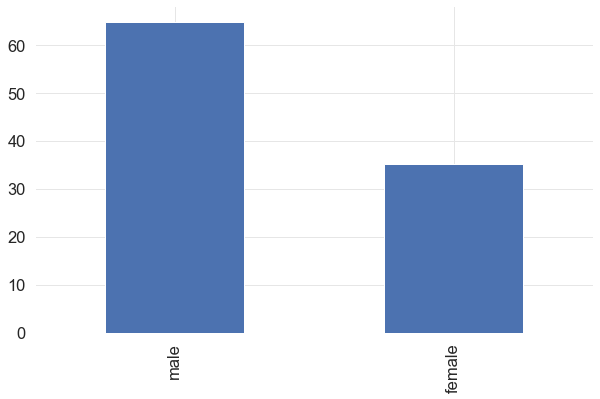

In [12]:
fig_sex = (train_data['Sex'].value_counts(normalize = True) * 100).plot.bar()

AxesSubplot(0.125,0.125;0.775x0.755)


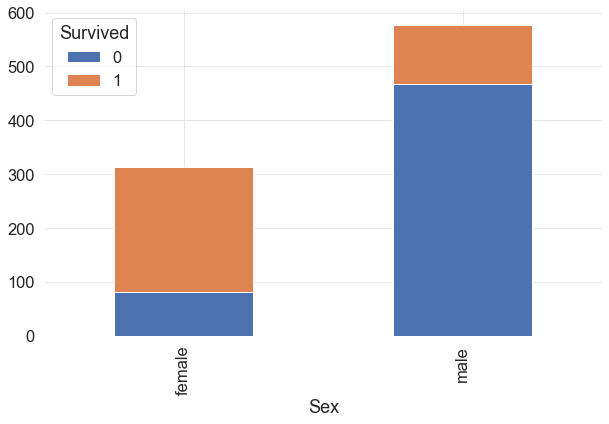

In [13]:
print(train_data.pivot_table('PassengerId',
                             'Sex',
                             'Survived',
                             'count').plot(kind='bar', stacked=True))

# Age 

In [14]:
train_data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [15]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
train_data['Age_group_ST'] = pd.cut(train_data['Age'], [0, 10, 20, 30, 40, 50, 60, 70, 80])

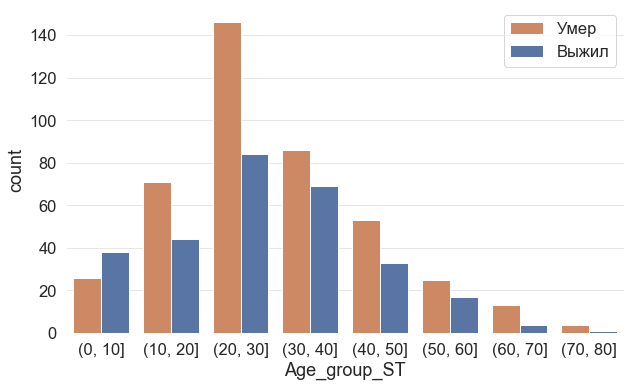

In [17]:
sns_age = sns.countplot(x = "Age_group_ST", hue = "Survived", data = train_data, palette=["C1", "C0"])
sns_age.legend(labels = ["Умер", "Выжил"])

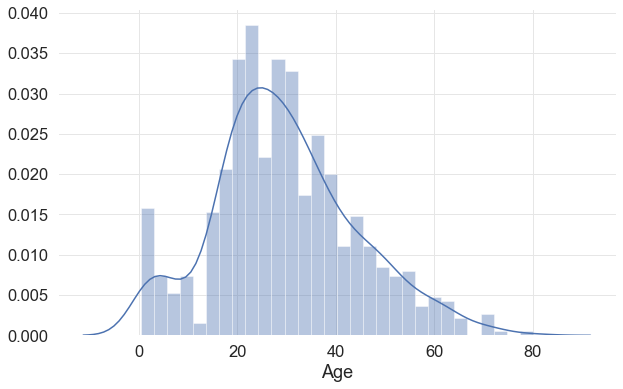

In [18]:
sns.distplot(train_data['Age'].dropna(),bins=30)

In [19]:
train_data['name_prefx_ST'] = train_data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())



train_data['name_prefx_ST'] = train_data['name_prefx_ST'].apply(lambda x: x if x in ['Mr','Mrs','Miss','Master', 'Dr'] else 'Others')

In [20]:
train_data['name_prefx_ST'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Others     20
Dr          7
Name: name_prefx_ST, dtype: int64

In [21]:
td_group_sp = train_data.groupby(['Sex', 'Pclass'])

In [22]:
td_group_sp['Age'].apply(lambda x: x.fillna(x.median()))


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [23]:
train_data['Age'].fillna(train_data['Age'].median, inplace = True)

# SibSp 

In [24]:
train_data.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [25]:
train_data['SibSp_group_ST'] = pd.cut(train_data['SibSp'], [0, 1, 2, 3, 4, 5, 6, 7, 8], include_lowest = True)

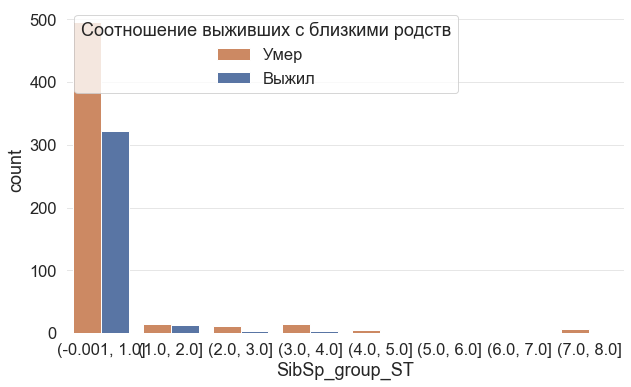

In [26]:
sns_sibsp = sns.countplot(x = "SibSp_group_ST", 
                          hue = "Survived", 
                          data = train_data, 
                          palette=["C1", "C0"]).legend(labels = ["Умер", "Выжил"])
sns_sibsp.set_title("Соотношение выживших с близкими родств")

# Parch 

In [27]:
train_data['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [29]:

train_data['parents_children_ST'] = train_data['Parch'].apply(lambda x: x if x in [0,1,2] else 4)

новые признаки семья 'Family' если нет семьи то колонка одиноких 'Solo'

In [30]:
train_data['Family_ST'] = train_data['Parch'] + train_data['SibSp']

#train_data['Solo_ST'] = train_data['Family_ST'] == 0
train_data['Solo_ST'] = train_data['Family_ST'].map(lambda x: 0 if x else 1).astype('category')

In [31]:
train_data['Solo_ST'].head()

0    0
1    0
2    1
3    0
4    1
Name: Solo_ST, dtype: category
Categories (2, int64): [0, 1]

# Ticket 

# Fare 

In [32]:
train_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [33]:
train_data['Fare_category_ST'] = pd.cut(train_data['Fare'],
                                        bins=[0, 7.90, 14.45, 31.28, 120], 
                                        labels=['Low', 'Low_Mid', 'High_Mid', 'High'])

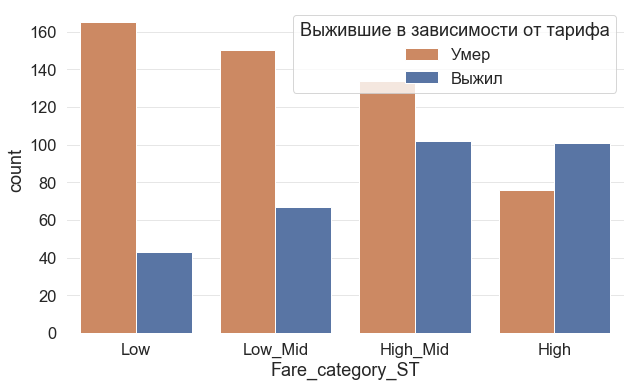

In [34]:
x = sns.countplot(data = train_data,
                  x = "Fare_category_ST",
                  hue = "Survived",
                  palette=["C1", "C0"]).legend(labels = ["Умер", "Выжил"])
x.set_title("Выжившие в зависимости от тарифа")

# Cabin

In [35]:
train_data['Cabin'] = train_data['Cabin'].fillna('n0n')

# Embarked

In [36]:
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [37]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)

# Encoding categorial & dropping columns

sex

In [38]:
train_data['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [39]:
train_data['Sex'] = train_data['Sex'].map(lambda x: 1 if x == 'male' else 0)
train_data['Sex'] = train_data['Sex'].astype('category')

Embarked

In [40]:
#train_EMB = pd.get_dummies(train_data['Embarked'], prefix="Emb_ST", drop_first = True)
#train_EMB.head()

In [ ]:
train_data.columns

In [ ]:
print(train_data.info())

In [ ]:
train_data.head()

In [41]:
train_data = pd.concat([train_data,
                pd.get_dummies(train_data['Cabin'], prefix="Cabin"),
                pd.get_dummies(train_data['Age_group_ST'], prefix="Age_group_ST"),
                pd.get_dummies(train_data['name_prefx_ST'], prefix="name_pref_ST", drop_first = True),
                pd.get_dummies(train_data['Fare_category_ST'], prefix="Fare_ST", drop_first = True),
                pd.get_dummies(train_data['Pclass'], prefix="Class", drop_first = True),
                pd.get_dummies(train_data['Embarked'], prefix="Emb_ST", drop_first = True)
               ],axis=1)

#td['Sex'] = LabelEncoder().fit_transform(td['Sex'])
#td['Is_Alone'] = LabelEncoder().fit_transform(td['Is_Alone'])

In [42]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 187 entries, PassengerId to Emb_ST_S
dtypes: category(5), float64(1), int64(7), object(6), uint8(168)
memory usage: 249.4+ KB
None


In [ ]:
train_data.head()

In [43]:
train_data.drop(['Cabin', 'Age_group_ST', 'name_prefx_ST',
                 'SibSp_group_ST', 'parents_children_ST',
                 'Fare_category_ST', 'Pclass', 'Embarked', 
                 'Name', 'Ticket', 'SibSp', 
                 'Parch', 'Fare', 'Age'
                ], axis=1, inplace=True)




In [ ]:
train_data.shape

In [ ]:
train_data.columns

In [ ]:
train_data.head()

In [44]:
train_data['Sex'] = train_data['Sex'].astype('uint8')
train_data['Solo_ST'] = train_data['Solo_ST'].astype('uint8')

In [45]:
col = list(train_data.columns)

In [46]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

train_data.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in train_data.columns.values]


# import and validation of models on training data

In [47]:

# импорт моделей
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error, confusion_matrix

#графики
import pylab as pl
import matplotlib.pyplot as plt


In [48]:
itog_val = {}
kfold = 5
random_state = 777

In [49]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

print(X.shape, y.shape)

(891, 172) (891,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

print(X_train.shape, y_train.shape)

(596, 172) (596,)


In [51]:
# Модель RandomForestClassifier
model_rfc = RandomForestClassifier(random_state=random_state,
                                   max_depth=9, 
                                   min_samples_leaf=1,
                                   min_samples_split=4,
                                   n_estimators=180)

In [52]:
# Модель KNeighborsClassifier
model_knc = KNeighborsClassifier(n_neighbors=13)

In [53]:
# Модель LogisticRegression
model_lr = LogisticRegression(penalty='l2',  tol=0.0001, random_state=random_state) 

In [54]:
# Модель  GradientBoostingClassifier
model_gbt = GradientBoostingClassifier(learning_rate=0.1,
                                       max_features=17,
                                       min_samples_leaf=6,
                                       min_samples_split=2,
                                       n_estimators=200,
                                       random_state=random_state)

In [55]:
# Модель  XGBClassifier
model_xgbc = xgb.XGBClassifier(max_depth=10, 
                               min_child_weight=1,
                               n_estimators=400, 
                               n_jobs=-1,
                               verbose=1, 
                               learning_rate=0.15,
                               seed=42, 
                               random_state=random_state)

In [56]:
scores = cross_val_score(model_rfc, X, y, cv = kfold)
itog_val['RandomForestClassifier'] = scores.mean()

In [57]:
scores = cross_val_score(model_knc, X, y, cv = kfold)
itog_val['KNeighborsClassifier'] = scores.mean()

In [58]:
scores = cross_val_score(model_lr, X, y, cv = kfold)
itog_val['LogisticRegression'] = scores.mean()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
  

In [59]:
scores = cross_val_score(model_gbt, X, y, cv = kfold)
itog_val['GradientBoostingClassifier'] = scores.mean()

In [60]:
scores = cross_val_score(model_xgbc, X, y, cv = kfold)
itog_val['XGBClassifier'] = scores.mean()

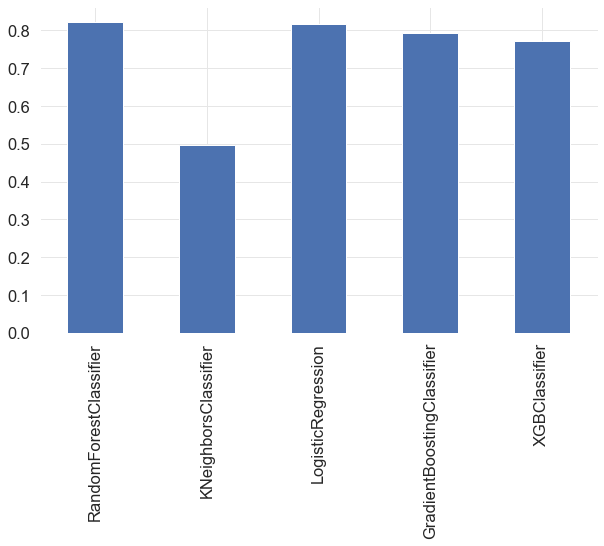

In [61]:
train_data.from_dict(data = itog_val, orient='index').plot(kind='bar', legend=False)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<Figure size 720x432 with 0 Axes>

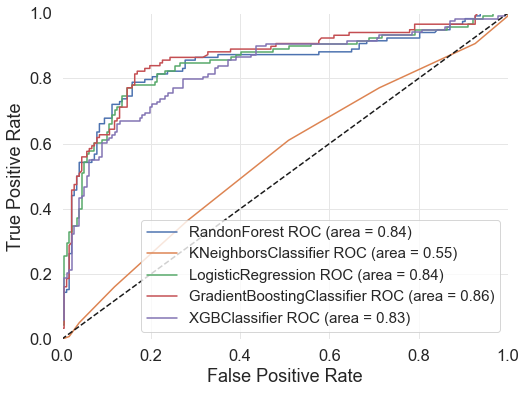

In [62]:
# прорисовка граффиков roc_auc, по моделям
pl.clf()
plt.figure(figsize=(8,6))


#RandomForestClassifier
probas = model_rfc.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RandonForest',roc_auc))

#KNeighborsClassifier
probas = model_knc.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNeighborsClassifier',roc_auc))

#LogisticRegression
probas = model_lr.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))

#GradientBoostingClassifier
probas = model_gbt.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('GradientBoostingClassifier',roc_auc))

# Модель  XGBClassifier 
probas = model_xgbc.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('XGBClassifier',roc_auc))



pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])

pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='small')

pl.show()

In [63]:
def f_err_predict_test_train(model, X_train, X_test, y_train, y_test):
    # ошибки на предсказания меток моделью
    
    err_train = np.mean(y_train != model.predict(X_train))
    err_test  = np.mean(y_test  != model.predict(X_test))
    
    print("ошибки на обучающей: {0:.2f}%".format(err_train*100))
    print("ошибки на тестовой: {0:.2f}%".format(err_test*100))
    

In [64]:
# модель GradientBoostingClassifier
predict = model_gbt.fit(X_train, y_train).predict(X_test)
f_err_predict_test_train(model_gbt, X_train, X_test, y_train, y_test)

print(accuracy_score(y_test, predict)) # 0.8101694915254237

ошибки на обучающей: 10.40%
ошибки на тестовой: 20.68%
0.7932203389830509


In [65]:
# модель LogisticRegression
predict = model_lr.fit(X_train, y_train).predict(X_test)
f_err_predict_test_train(model_lr, X_train, X_test, y_train, y_test)

print(accuracy_score(y_test, predict))  # 0.8169491525423729

ошибки на обучающей: 16.28%
ошибки на тестовой: 19.32%
0.8067796610169492


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [106]:
#model RandomForestClassifier
model_rfc = RandomForestClassifier(random_state=random_state,
                                   max_depth=11, 
                                   min_samples_leaf=2,
                                   min_samples_split=2,
                                   n_estimators=90)

predict = model_rfc.fit(X_train, y_train).predict(X_test)
f_err_predict_test_train(model_rfc, X_train, X_test, y_train, y_test)

print(accuracy_score(y_test, predict))   # 0.8203389830508474

ошибки на обучающей: 12.08%
ошибки на тестовой: 17.97%
0.8203389830508474


# Cleaning Test Data

In [107]:
#test_data = pd.read_csv("../input/titanic/test.csv")

test_data = pd.read_csv("../data/test.csv")


In [109]:
test_data['Age_group_ST'] = pd.cut(test_data['Age'], [0, 10, 20, 30, 40, 50, 60, 70, 80])
test_data['name_prefx_ST'] = test_data['Name'].apply(lambda x: x if x in ['Mr','Mrs','Miss','Master', 'Dr'] else 'Others')

tstd_group_sp = test_data.groupby(['Sex', 'Pclass'])
tstd_group_sp['Age'].apply(lambda x: x.fillna(x.median()))
test_data['Age'].fillna(test_data['Age'].median, inplace = True)


test_data['SibSp_group_ST'] = pd.cut(test_data['SibSp'], [0, 1, 2, 3, 4, 5, 6, 7, 8], include_lowest = True)


test_data['parents_children_ST'] = test_data['Parch'].apply(lambda x: x if x in [0,1,2] else 4)

test_data['Family_ST'] = test_data['Parch'] + test_data['SibSp']
test_data['Solo_ST'] = test_data['Family_ST'].map(lambda x: 0 if x else 1).astype('category')


test_data['Fare_category_ST'] = pd.cut(test_data['Fare'],
                                        bins=[0, 7.90, 14.45, 31.28, 120], 
                                        labels=['Low', 'Low_Mid', 'High_Mid', 'High'])


test_data['Cabin'] = test_data['Cabin'].fillna('n0n')


test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace = True)


test_data['Sex'] = test_data['Sex'].map(lambda x: 1 if x == 'male' else 0)
test_data['Sex'] = test_data['Sex'].astype('category')


test_data['Sex'] = test_data['Sex'].astype('uint8')
test_data['Solo_ST'] = test_data['Solo_ST'].astype('uint8')

In [110]:
test_data = pd.concat([test_data,
                pd.get_dummies(test_data['Cabin'], prefix="Cabin"),
                pd.get_dummies(test_data['Age_group_ST'], prefix="Age_group_ST"),
                pd.get_dummies(test_data['name_prefx_ST'], prefix="name_pref_ST", drop_first = True),
                pd.get_dummies(test_data['Fare_category_ST'], prefix="Fare_ST", drop_first = True),
                pd.get_dummies(test_data['Pclass'], prefix="Class", drop_first = True),
                pd.get_dummies(test_data['Embarked'], prefix="Emb_ST", drop_first = True)
               ],axis=1)



In [111]:
test_data.drop(['Cabin', 'Age_group_ST', 'name_prefx_ST',
                 'SibSp_group_ST', 'parents_children_ST',
                 'Fare_category_ST', 'Pclass', 'Embarked', 
                 'Name', 'Ticket', 'SibSp', 
                 'Parch', 'Fare', 'Age'], axis=1, inplace=True)

In [112]:

test_data.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test_data.columns.values]


In [113]:
train_data.shape

(891, 173)

In [114]:
common_features = list(set(train_data.columns).intersection(set(test_data.columns)))


# Predict 

In [115]:
y_train=train_data['Survived']
X_train=train_data[common_features]
X_test=test_data[common_features]

In [116]:
%%time
#model RandomForestClassifier

predict = model_rfc.fit(X_train, y_train).predict(X_test)

CPU times: user 200 ms, sys: 4.64 ms, total: 205 ms
Wall time: 208 ms


In [117]:
%%time
# модель GradientBoostingClassifier

predict1 = model_gbt.fit(X_train, y_train).predict(X_test)

CPU times: user 234 ms, sys: 3.18 ms, total: 237 ms
Wall time: 240 ms


# Save result

In [118]:
from datetime import datetime
import os
date_current = datetime.today().strftime('%d_%m')

if not os.path.exists('../data_out'):
    os.makedirs('../data_out')


In [119]:

result = pd.DataFrame({'PassengerId':X_test['PassengerId'],'Survived':predict1})
result['Survived'] = result['Survived'].astype(int)

filename = f'../data_out/titanic_predict_model_gbt_{date_current}.csv'
result.to_csv(filename,index=False)


print('Saved file:' + filename)

Saved file:../data_out/titanic_predict_model_gbt_13_01.csv


In [ ]:
# 0.79425 with model GradientBoostingClassifier
